In [1]:
from math import pi
import numpy as np
from numpy.random import normal
import matplotlib.pyplot as plt
import pandas as pd

# Simulate random trajectory of AR(1) process: y[t+1] = phi*y[t] + epsilon[t+1]
def simAR1(N, phi, sigma, const = 0, burn=100):
  y = np.zeros((N+burn))
  for t in range(N+burn-1):
    y[t+1] = const + phi*y[t] + normal(scale = sigma, size=1)[0]     
  return y[burn:]

def cycle(N, nof_cycles = 1):
  return np.cos(2*pi*np.arange(0,N)*nof_cycles/N)

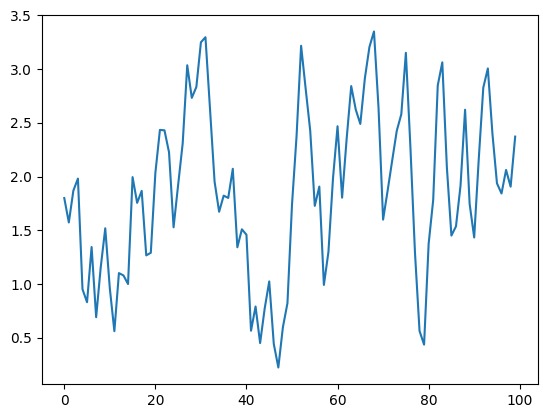

In [2]:
#np.random.seed(0)   # set seed

N = 1*10**2
omega = 1
phi_true = 0.77
sigma_true = 0.5

y = simAR1(N, phi = phi_true, sigma = sigma_true, const = 0.5)
#y1 = omega*cycle(N, nof_cycles = 2) + simAR1(N, phi = 0.7, sigma = 0.6)
#y2 = omega*cycle(N, nof_cycles = 2) + simAR1(N, phi = 0.7, sigma = 0.6)
#y3 = omega*cycle(N , nof_cycles = 2) + simAR1(N , phi = 0.5, sigma = 1.4)
#y4 = omega*cycle(N, nof_cycles = 2) 

# Plot trajectories:
#---------------------
plt.figure()
pd.Series(y).plot() 
plt.show();

In [3]:
#from typing import Optional

class KalmanFilter:
    def __init__(self, x0: float, P0: float, A: float, H: float, Q: float, R: float):
        """
        Initialize the Kalman Filter
        :param x0: Initial state estimate.
        :param P0: Initial covariance estimate.
        :param A: State transition matrix.
        :param H: Observation matrix.
        :param Q: Process noise covariance.
        :param R: Measurement noise covariance.
        """
        self.x = np.array([x0])  # Ensure state is a column vector
        self.P = np.array([[P0]])  # Covariance must be a matrix
        self.A = np.array([[A]])  # State transition matrix
        self.H = np.array([[H]])  # Observation matrix
        self.Q = np.array([[Q]])  # Process noise covariance
        self.R = np.array([[R]])  # Measurement noise covariance

    def predict(self):
        """ Prediction step of the Kalman Filter """
        self.x = np.dot(self.A, self.x)
        self.P = np.dot(self.A, np.dot(self.P, self.A.T)) + self.Q

    def update(self, z):
        """ Update step of the Kalman Filter """
        S = np.dot(self.H, np.dot(self.P, self.H.T)) + self.R
        K = np.dot(self.P, np.dot(self.H.T, np.linalg.inv(S)))
        self.x = self.x + np.dot(K, (z - np.dot(self.H, self.x)))
        I = np.eye(self.P.shape[0])
        self.P = np.dot((I - np.dot(K, self.H)), self.P)

# Parameters for the Kalman Filter
phi = 0.77  # AR coefficient
Q = 0.1  # Process noise variance
R = 0.1  # Measurement noise variance
x0 = 0   # Initial state
P0 = 1   # Initial estimate of state covariance
H = 1    # Observation matrix scalar since we observe the state directly

kf = KalmanFilter(x0, P0, phi, H, Q, R)

Fitting the linear state space model

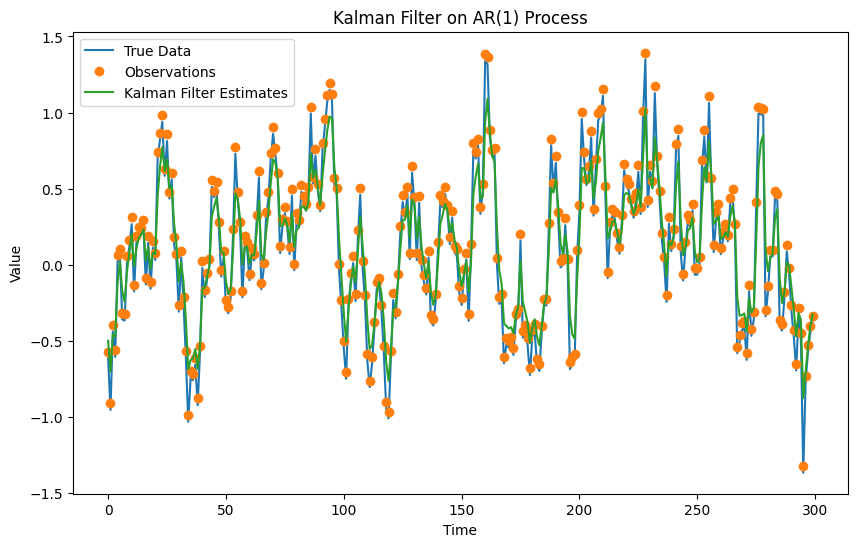

In [4]:
N = 300  # Number of observations

true_data = simAR1(N, phi, np.sqrt(Q))              # latent states
observed_data = true_data + normal(scale=np.sqrt(R), size=N)[0]       # add normal noise to 'true' latent process 

estimates = []
for z in observed_data:
    kf.predict()
    kf.update(z)
    estimates.append(kf.x)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(true_data, label='True Data')
plt.plot(observed_data, 'o', label='Observations')
plt.plot(estimates, label='Kalman Filter Estimates')
plt.legend()
plt.title('Kalman Filter on AR(1) Process')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show();